In [2]:
library("cowplot")
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggpubr))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(plyr))
suppressPackageStartupMessages(library(stringr))

Warning message:
“package ‘cowplot’ was built under R version 4.3.3”
Warning message:
“package ‘dplyr’ was built under R version 4.3.3”
Warning message:
“package ‘tidyr’ was built under R version 4.3.3”
Warning message:
“package ‘tibble’ was built under R version 4.3.3”
Warning message:
“package ‘patchwork’ was built under R version 4.3.3”
Warning message:
“package ‘plyr’ was built under R version 4.3.3”
Warning message:
“package ‘stringr’ was built under R version 4.3.3”


In [3]:
df<-read.csv('01_Olink_Analysis/selected_protein_OverTime.csv')

In [4]:
df <- df %>% dplyr::mutate(`Age Group` = case_when(
  cohort.cohortGuid == "BR1" ~ "Young",
  cohort.cohortGuid == "BR2" ~ "Older",
  TRUE ~ NA_character_
))
df$`Age Group`<-factor(df$`Age Group`,levels=c("Young","Older"))

In [7]:
write.csv(df %>% filter(Assay %in% c( "CXCL17","WNT9A")) %>% 
         select(Assay,NPX_bridged,sample.daysSinceFirstVisit,subject.subjectGuid,`Age Group`),
          "/home//workspace/Source_Data/Fig1c.csv", row.names=FALSE) 

`geom_smooth()` using formula = 'y ~ x'


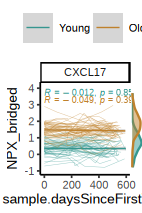

In [50]:
options(repr.plot.width = 30/25.4, repr.plot.height = 45/25.4)

max_value <- max((df %>% filter(Assay == "CXCL17"))$NPX_bridged, na.rm = TRUE)

p1 <- ggplot(df %>% filter(Assay == "CXCL17"),
             aes(sample.daysSinceFirstVisit, NPX_bridged, color = `Age Group`)) +
  geom_smooth(method = "lm", se = TRUE, linewidth = 0.3) +
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  theme_classic(base_size = 8) +
  theme(legend.position = "top",
        legend.title = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        strip.background = element_rect(linewidth = 0.5),
        axis.title.x = element_text(margin = margin(t = 2))) +
  geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)),
            linewidth = 0.1, alpha = 0.5, linetype = 1) +
  facet_wrap(~Assay) +
  stat_cor(data = df %>% filter(Assay == "CXCL17", `Age Group` == "Older"),
           method = "spearman",
           label.x.npc = "left",
            label.y = max_value * 1.1,
           size = 1.76, color = '#bf812d') +
  stat_cor(data = df %>% filter(Assay == "CXCL17", `Age Group` == "Young"),
           method = "spearman",
           label.x.npc = "left",
           label.y = max_value * 1.25,
           size = 1.76, color = '#35978f') +
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.15)))

p2 <- ggplot(df %>% filter(Assay == "WNT9A"),
             aes(NPX_bridged, fill = `Age Group`, color = `Age Group`)) +
  geom_density(alpha = 0.5, linewidth = 0.5) +
  scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  scale_x_continuous(expand = expansion(mult = c(0.1, 0.15))) +
  coord_flip() +
  theme_void(base_size = 8) +
  theme(legend.position = "none",
        plot.margin = margin(0, 0, 0, -1, "mm"))

combined_plot <- plot_grid(p1, p2, ncol = 2, rel_widths = c(10, 0.4),
                           align = 'h', axis = 'tb')
combined_plot

ggsave(filename = "FigureC-1.pdf", plot = combined_plot,
       width = 30 / 25.4, height = 45 / 25.4)

`geom_smooth()` using formula = 'y ~ x'


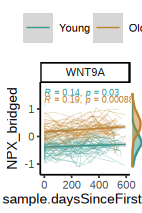

In [49]:
max_value <- max((df %>% filter(Assay == "WNT9A"))$NPX_bridged, na.rm = TRUE)

p1 <- ggplot(df %>% filter(Assay == "WNT9A"),
             aes(sample.daysSinceFirstVisit, NPX_bridged, color = `Age Group`)) +
  geom_smooth(method = "lm", se = TRUE, linewidth = 0.3) +
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  theme_classic(base_size = 8) +
  theme(legend.position = "top",
        legend.title = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank(),
        strip.background = element_rect(linewidth = 0.5),
        axis.title.x = element_text(margin = margin(t = 2))) +
  geom_line(aes(group = interaction(`Age Group`, subject.subjectGuid)),
            linewidth = 0.1, alpha = 0.5, linetype = 1) +
  facet_wrap(~Assay) +
  stat_cor(data = df %>% filter(Assay == "WNT9A", `Age Group` == "Older"),
           method = "spearman",
           label.x.npc = "left",
            label.y = max_value * 1.1,
           size = 1.76, color = '#bf812d') +
  stat_cor(data = df %>% filter(Assay == "WNT9A", `Age Group` == "Young"),
           method = "spearman",
           label.x.npc = "left",
           label.y = max_value * 1.32,
           size = 1.76, color = '#35978f') +
  scale_y_continuous(expand = expansion(mult = c(0.1, 0.15)))

p2 <- ggplot(df %>% filter(Assay == "WNT9A"),
             aes(NPX_bridged, fill = `Age Group`, color = `Age Group`)) +
  geom_density(alpha = 0.5, linewidth = 0.5) +
  scale_fill_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  scale_color_manual(values = c("Older" = '#bf812d', "Young" = '#35978f')) +
  scale_x_continuous(expand = expansion(mult = c(0.1, 0.15))) +
  coord_flip() +
  theme_void(base_size = 8) +
  theme(legend.position = "none",
        plot.margin = margin(0, 0, 0, -1, "mm"))

combined_plot <- plot_grid(p1, p2, ncol = 2, rel_widths = c(10, 0.4),
                           align = 'h', axis = 'tb')
combined_plot

ggsave(filename = "FigureC-2.pdf", plot = combined_plot,
       width = 30 / 25.4, height = 45 / 25.4)